# Predicting Tip Amounts Using Regression Techniques
**Assignment 02**

This notebook aims to explore tipping behavior using regression techniques to help restaurants understand factors influencing tipping and to optimize services.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm

## Loading and Preprocessing Data
Let's load the tips dataset, inspect it for any missing values, and preprocess it for analysis.

In [2]:
# Load the dataset
file_path = "tips (data for regression problem).csv"
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# Explore dataset details
data.info()

# Check for null values
data.isnull().sum()

# Basic statistics
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Exploratory Data Analysis
To understand factors affecting tipping, let's analyze the relationships between features and the target variable (`tip`) using visualizations.

## Scatter Plot: Total Bill vs Tip
Visualizing the relationship between the total bill and tip amounts.


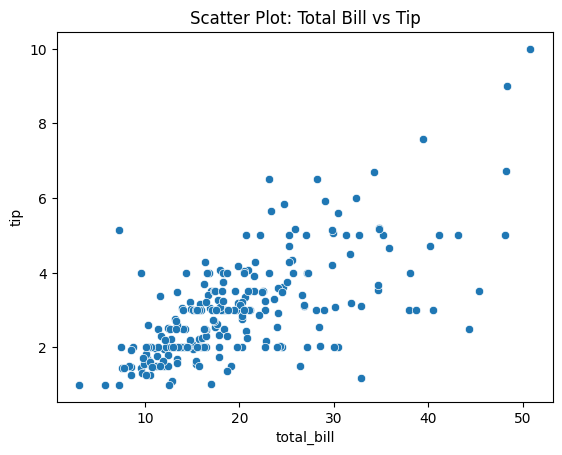

In [4]:
# Scatter plot between total_bill and tip
sns.scatterplot(data=data, x='total_bill', y='tip')
plt.title('Scatter Plot: Total Bill vs Tip')
plt.show()

## Pair Plot: Multi-feature Analysis
Visualizing pairwise relationships across all features


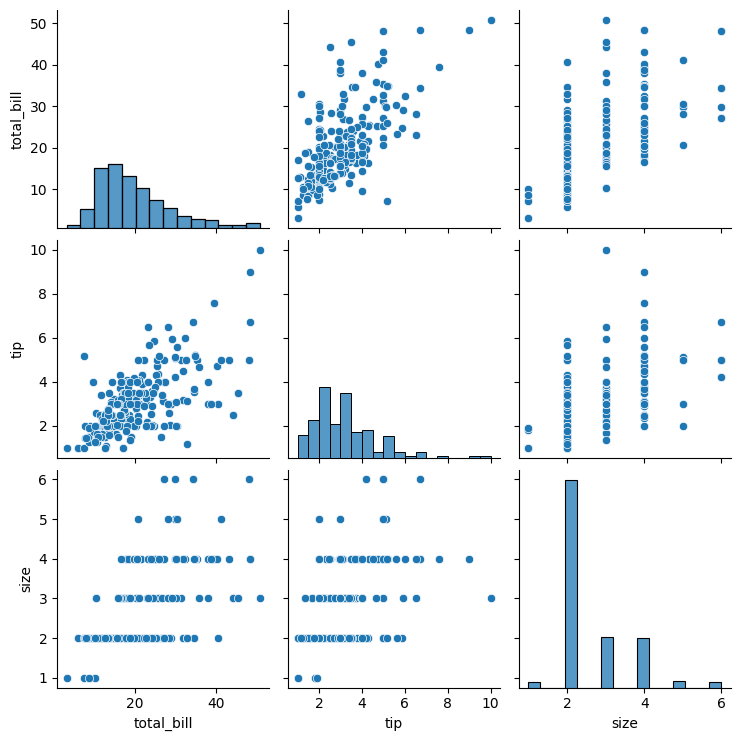

In [5]:
# Pair plot for multiple features
sns.pairplot(data)
plt.show()

## Correlation Heatmap
Analyzing relationships among numeric features after encoding categorical variables


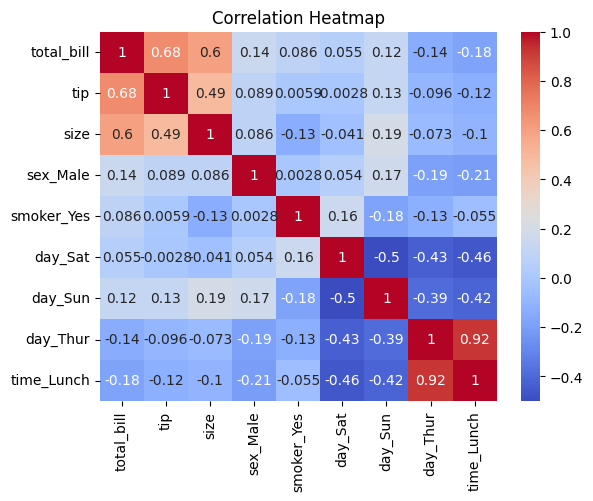

In [6]:
# One-hot encode categorical variables (if not already encoded)
data_encoded = pd.get_dummies(data, drop_first=True)

# Correlation matrix
correlation = data_encoded.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Statistical Tests for Linearity: Rainbow Test
Performing the Rainbow Test to check the linearity of predictors


In [7]:
# Rainbow Test
X = data[['total_bill']]  # Predictor(s)
y = data['tip']  # Target variable

X = sm.add_constant(X)  # Adding constant term
model = sm.OLS(y, X).fit()
rainbow_statistic, rainbow_p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {rainbow_statistic}")
print(f"Rainbow Test p-value: {rainbow_p_value}")


Rainbow Test Statistic: 1.2291480226129028
Rainbow Test p-value: 0.12911921525513964


## Residuals Plot
Visualizing residuals to assess the goodness of fit for a linear model


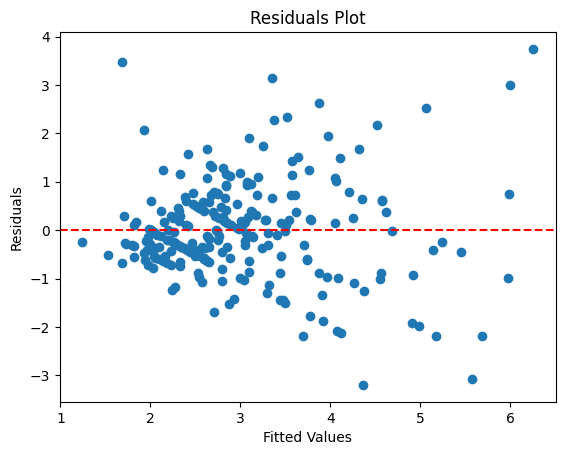

In [8]:
# Residual plot
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


## Prepare Data for Modeling

In [9]:
# Splitting the dataset into training and testing sets
X = data_encoded.drop('tip', axis=1)
y = data_encoded['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Regression Models
We'll build and evaluate multiple regression models to predict tip amounts.
### Models to implement:
1. Linear Regression
2. Ridge and Lasso Regression
3. Decision Tree Regression
4. Random Forest Regression
5. Support Vector Regression (SVR)
6. K-Nearest Neighbos (KNN)


In [10]:
# Linear Regression
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluate
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_linear))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_linear)))

Linear Regression R2 Score: 0.43730181943482505
Linear Regression RMSE: 0.838663580790063


In [11]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("Ridge Regression R2 Score:", r2_score(y_test, y_pred_ridge))
print("Ridge Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

Ridge Regression R2 Score: 0.4393889716178486
Ridge Regression RMSE: 0.8371067562274285


In [12]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

print("Lasso Regression R2 Score:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Lasso Regression R2 Score: 0.5273068720881755
Lasso Regression RMSE: 0.768669542129225


In [13]:
# Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree R2 Score:", r2_score(y_test, y_pred_tree))
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tree)))

Decision Tree R2 Score: -0.004178121600921791
Decision Tree RMSE: 1.120354353564541


In [14]:
# Random Forest Regression
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

print("Random Forest R2 Score:", r2_score(y_test, y_pred_forest))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_forest)))

Random Forest R2 Score: 0.2642455218065466
Random Forest RMSE: 0.9589953153680993


In [15]:
# SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

print("SVR R2 Score:", r2_score(y_test, y_pred_svr))
print("SVR RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))

SVR R2 Score: 0.5740891915042663
SVR RMSE: 0.7296412174909251


In [16]:
# KNN Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN R2 Score:", r2_score(y_test, y_pred_knn))
print("KNN RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))

KNN R2 Score: 0.29888587066985495
KNN RMSE: 0.9361477294896203


## Feature Importance Analysis for SVR
Since SVR does not provide feature importances directly, we analyze the effect of each feature on the predictions using permutation importance


Feature Importance based on Permutation Importance:
      Feature  Importance
0  total_bill    1.023216
2    sex_Male    0.003039
4     day_Sat   -0.000295
7  time_Lunch   -0.000747
3  smoker_Yes   -0.001164
6    day_Thur   -0.001743
5     day_Sun   -0.002558
1        size   -0.014094


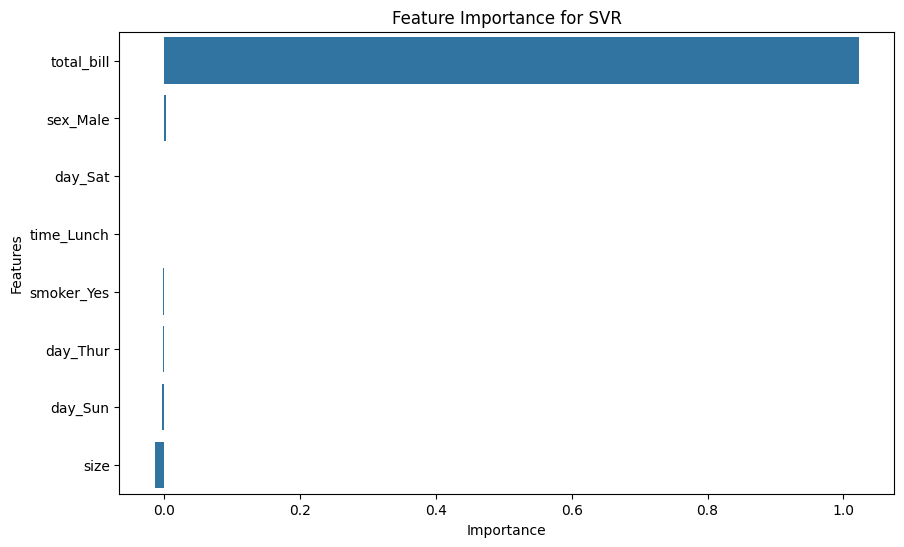

In [17]:
# Calculate permutation importance for SVR
from sklearn.inspection import permutation_importance

# Permutation importance
perm_importance = permutation_importance(svr_model, X_test, y_test, scoring='r2', random_state=42)

# Display results
feature_importances = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print("Feature Importance based on Permutation Importance:")
print(feature_importances)

# Plot feature importances without using a palette
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title('Feature Importance for SVR')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Important insights
## Insights for Management:
 - SVR provided better accuracy compared to other models.
  - The **total_bill** feature shows the highest permutation importance, indicating that the tip amount is highly correlated with the total bill amount. This implies that as the total bill increases, the tip amount generally increases as well.
  - To optimize revenue, strategies like offering discounts or promotions for larger bills can encourage customers to spend more, indirectly leading to higher tips
 - Revenue can be optimized by focusing on service attributes linked with higher tips.